#  **MIAS Mammography - Datensatz**


---
## **Datenexploration**
---



In [ ]:
# Import
import numpy as np
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# read image_infos.txt
url = '/content/drive/MyDrive/Breast_cancer_pytorch/dataset/'
filename = url+'image_infos.txt'
mias_df= pd.read_csv(filename, sep=" ") 
mias_df.head()

,REFNUM,CBG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0


In [ ]:
mias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REFNUM    330 non-null    object 
 1   CBG       330 non-null    object 
 2   CLASS     330 non-null    object 
 3   SEVERITY  123 non-null    object 
 4   X         119 non-null    float64
 5   Y         119 non-null    float64
 6   RADIUS    119 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.2+ KB


In [ ]:
#########################################
# Welche und wie viel Daten liegen vor?
#########################################
severity = {'B':'Gutartig (B)','M':'Bösartig (M)'}
cbg= {'F':'niedrige Brustdichte (F)','G':'mittlere Brustdichte (G)','D':'hohe Brustdichte(D)'}
anomaly={'NORM':'Normal','CALC':'Verkalkung (CALC)','CIRC':'gut definierte Brustmassen (CIRC)','SPIC':'spekulierte Brustmassen (SPIC)',
      'MISC':'schlecht definierte Brustmassen (MISC)','ARCH':'Architekturverzerrung (ARCH)','ASYM':'Brustasymmetrie (ASYM)'}

#print('SEVERITY\n-----')
sev_sums =[]
for i in severity:
    sev_sum= mias_df.SEVERITY[mias_df.SEVERITY== i].count()
    sev_perz= mias_df.SEVERITY[mias_df.SEVERITY== i].count()/mias_df.SEVERITY.count()*100
    #print(severity[i]+': {}  -> {:.2f}%'.format (sev_sum,sev_perz))
    sev_sums.append(sev_sum)

#Bilder im normalen Zustand
normal= 330 - (sev_sums[0]+sev_sums[1])
normal_pro= (330 -(sev_sums[0]+sev_sums[1]))/330*100
sev_sums.append(normal)
severity.update({"N": "Normal"}) 

#print('\nCBG\n-----')
cbg_sums=[]
for i in cbg:
    cbg_sum= mias_df.CBG[mias_df.CBG== i].count()
    cbg_perz= mias_df.CBG[mias_df.CBG== i].count()/mias_df.CBG.count()*100
    #print(cbg[i]+': {}  -> {:.2f}%'.format (cbg_sum,cbg_perz)) 
    cbg_sums.append(cbg_sum)

class_sums=[]
for i in anomaly:
    class_sum= mias_df.CLASS[mias_df.CLASS== i].count()
    class_perz= mias_df.CLASS[mias_df.CLASS== i].count()/mias_df.CLASS.count()*100
    #print(clas[i]+': {}  -> {:.2f}%'.format (class_sum,class_perz)) 
    class_sums.append(class_sum)
#print (cbg_sums)
print('done')

done


In [ ]:
# Schwergrad
data_sev= {'severity':severity.values(),'Anzahl':sev_sums}
 
# Art und Anzahl von Tumoren
df_sev= pd.DataFrame(data_sev)
df_sev.sort_values(by=['Anzahl'], ascending=False)

,severity,Anzahl
2,Normal,207
0,Gutartig (B),69
1,Bösartig (M),54


In [ ]:
# Einteilungen der Brustdichte 
data_cbg = {'CBG':cbg.values(),'Anzahl':cbg_sums}
 
# Create DataFrame
df_cbg = pd.DataFrame(data_cbg)
df_cbg.sort_values(by=['Anzahl'], ascending=False)

,CBG,Anzahl
2,hohe Brustdichte(D),117
0,niedrige Brustdichte (F),109
1,mittlere Brustdichte (G),104


In [ ]:
# Brustanomalien 
data_class = {'CLASS':anomaly.values(),'Anzahl':class_sums}
 
# Create DataFrame
df_class = pd.DataFrame(data_class)
df_class.sort_values(by=['Anzahl'], ascending=False)

,CLASS,Anzahl
0,Normal,207
1,Verkalkung (CALC),30
2,gut definierte Brustmassen (CIRC),25
3,spekulierte Brustmassen (SPIC),19
5,Architekturverzerrung (ARCH),19
4,schlecht definierte Brustmassen (MISC),15
6,Brustasymmetrie (ASYM),15


In [ ]:
###################################
# Subplots: Schwergrad, Brustdichte
###################################
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Schwergrad", "Brustdichte"),
    specs=[[{"type": "domain"}, {"type": "domain"}]])

#SEVERITY
fig.add_trace(go.Pie(values=sev_sums,labels=list(severity.values()),pull=[0, 0.1, 0]),row=1, col=1)

#CBG
fig.add_trace(go.Pie(values=cbg_sums,labels=list(cbg.values()), pull=[0, 0, 0.1]), row=1, col=2)
fig.data[1].marker.line.width = 3
fig.data[1].marker.line.color = "black"

fig.update_layout(showlegend= False, 
                 annotations=[dict(text='Schwergrad', x= 0.22, font_size=25, showarrow=False),
                 dict(text='Brustdichte', x=0.78, y= 1.05, font_size=25, showarrow=False)])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


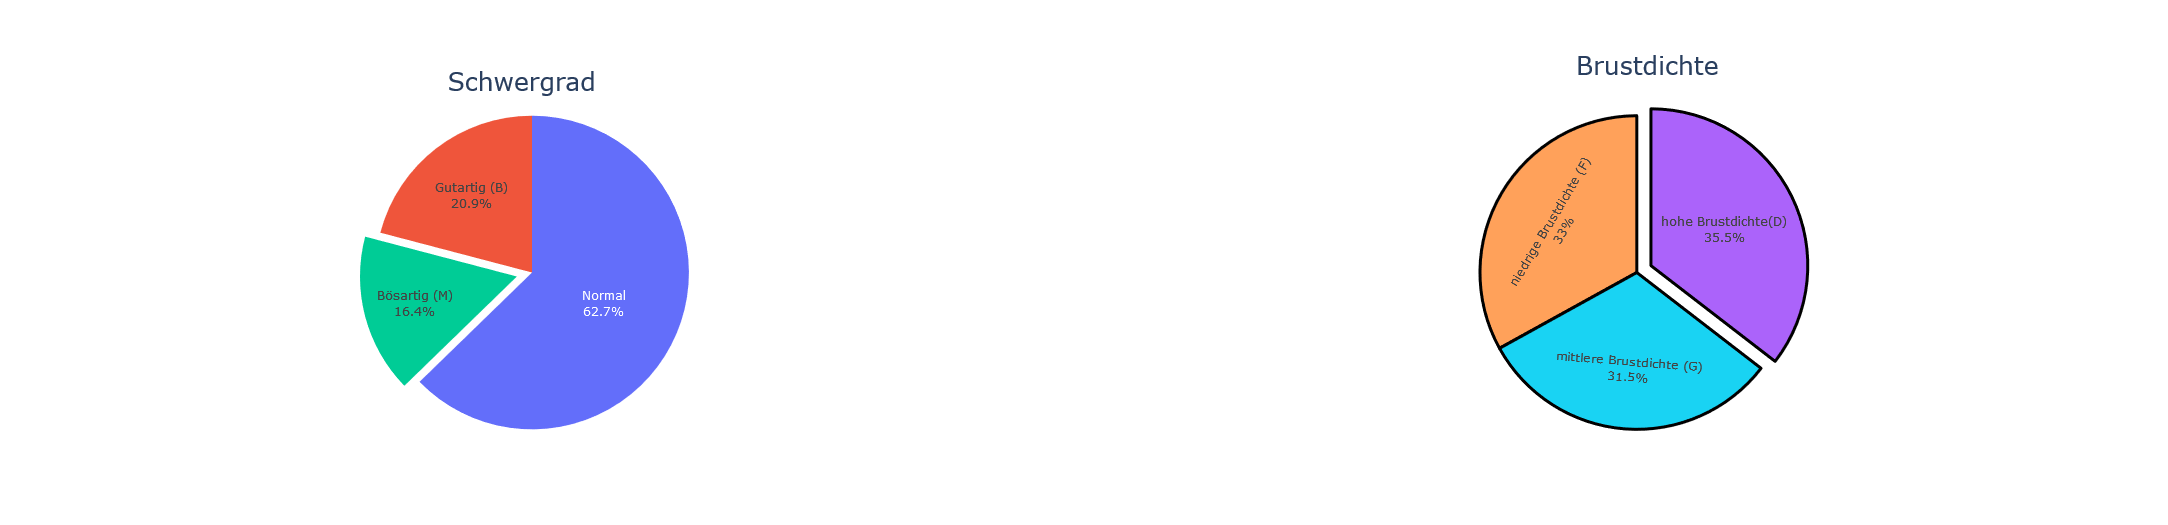

In [ ]:
###########################
# Plot: Brustanomalien
###########################
fig = px.pie(values=class_sums, names=list(anomaly.values()), hole=.3)
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=10)
fig.update_layout(width=900,height=750,showlegend=False, 
                  annotations=[dict(text='Anomalie', x=0.50, y=0.5, font_size=20, showarrow=False)])
                
fig.show()

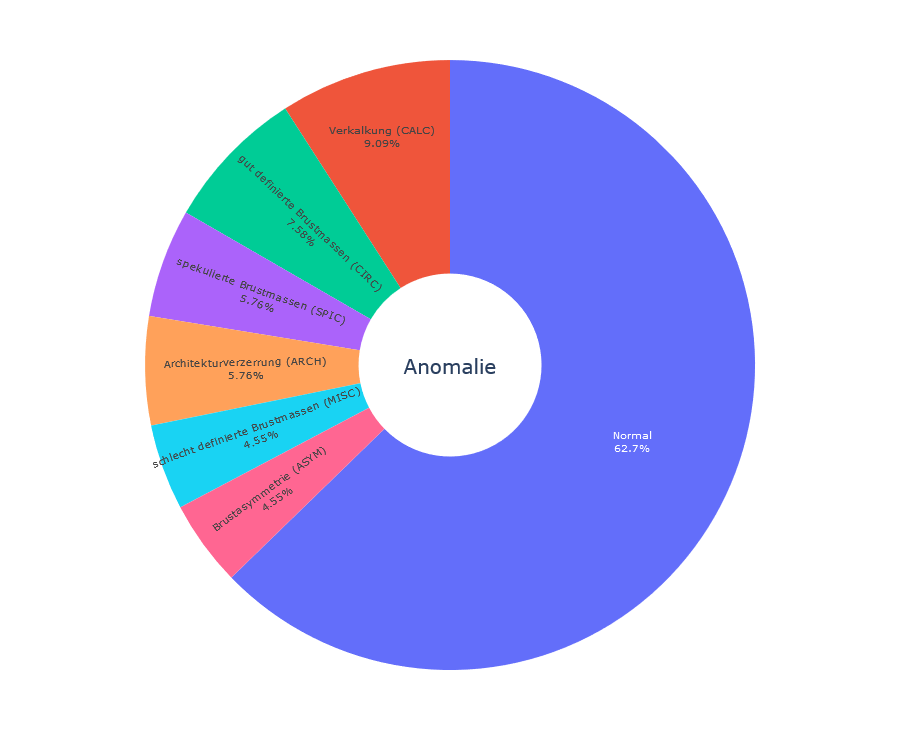

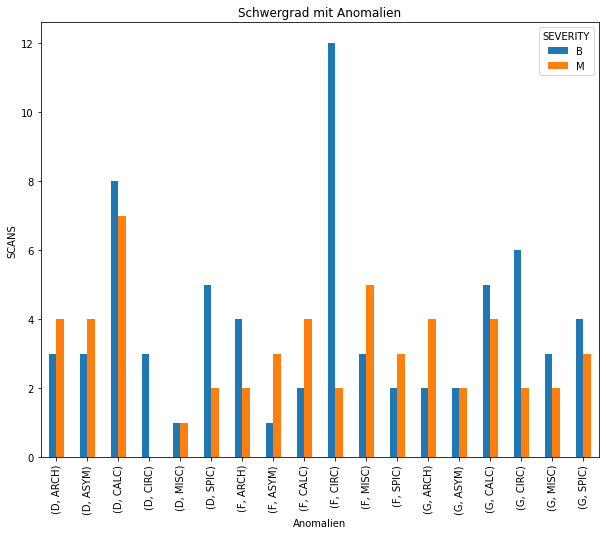

In [ ]:
##################################################
# Plot: Schwergrad, Brustdichte und Brustanomalien
##################################################
mias_df[mias_df.CLASS != 'NORM'].groupby(['CBG','CLASS', 'SEVERITY']).size().unstack().plot(kind='bar', 
                                                                                      #stacked=True, 
                                                                                      figsize=(10, 8), 
                                                                                      xlabel='Anomalien', 
                                                                                      ylabel='SCANS',
                                                                                      title='Schwergrad mit Anomalien');

B: gutartig
- F + CIRC
- D + CALC
- G + CIRC
- D + SPIC
- G + CALC

M: bösartig
- F + MISC
- F + CALC
- D + CALC
- D + ARCH
- D + ASYM
- G + ARCH
- G + CALC

### **Tumore mit hoher Brustdichte(D) und Verkalkung (CALC) können oft gutartig und bösartig sein**

In [ ]:
mias_D_CALC= mias_no_nan[(mias_no_nan['CBG'] == 'D') & (mias_no_nan['CLASS'] == 'CALC')]
#mias_D_CALC.groupby('SEVERITY').count()
mias_D_CALC

,REFNUM,CBG,CLASS,SEVERITY,X,Y,RADIUS
224,mdb222,D,CALC,B,398.0,427.0,17.0
225,mdb223,D,CALC,B,523.0,482.0,29.0
226,mdb223,D,CALC,B,591.0,529.0,6.0
229,mdb226,D,CALC,B,287.0,610.0,7.0
230,mdb226,D,CALC,B,329.0,550.0,25.0
231,mdb226,D,CALC,B,531.0,721.0,8.0
241,mdb236,D,CALC,B,276.0,824.0,14.0
244,mdb239,D,CALC,M,645.0,755.0,40.0
245,mdb239,D,CALC,M,567.0,808.0,25.0
246,mdb240,D,CALC,B,643.0,614.0,23.0


In [ ]:
mias_D_CALC['SEVERITY'].value_counts()

B    8
M    6
Name: SEVERITY, dtype: int64

In [ ]:
# Plot Tumore mit hoher Brustdichte und Verkalkung: D und CALC
mias_D_CALC= mias_no_nan[(mias_no_nan['CBG'] == 'D') & (mias_no_nan['CLASS'] == 'CALC')]

fig = px.scatter(mias_D_CALC, x="X",  size="RADIUS", y="Y", color="SEVERITY", size_max=20, 
                 hover_name="SEVERITY")
fig.update_layout(title={'text': "Schwergrad der Tumore mit hoher Brustdichte(D) und Verkalkung (CALC)",'y':0.95,
                                         'x':0.45,
                                         'yanchor': 'top'},title_font_size=30,font_size=15)


fig.show()


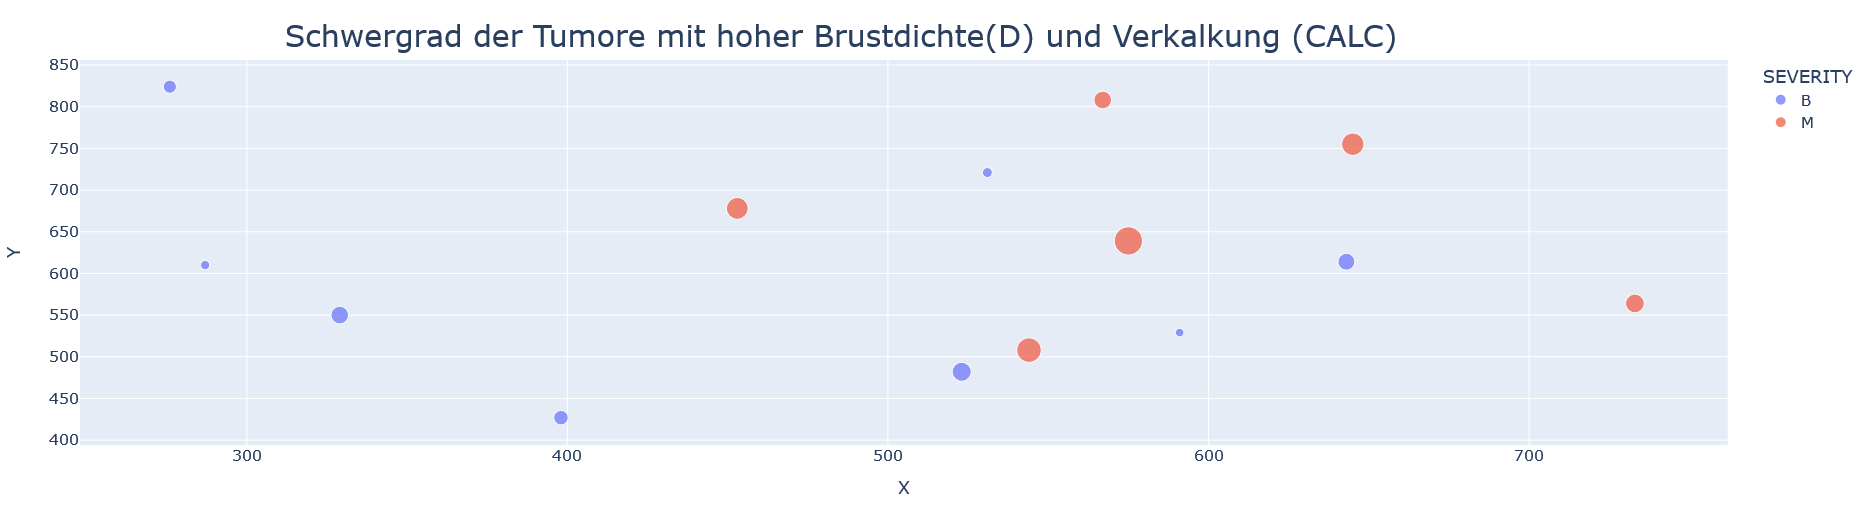

In [ ]:
#################################################
# Plot: Schwergrad, X-und Y-Koordinate und Radius
#################################################
# zellen löschen mit NAN values
mias_no_nan=mias_df.dropna()

# no sep.-> hover_name="SEVERITY"
# sep. -> facet_col="SEVERITY"
fig = px.scatter(mias_no_nan, x="X",  size="RADIUS", y="Y", color="SEVERITY", size_max=20, 
                 hover_name="SEVERITY")
fig.update_layout(title={'text': "Schwergrad der Tumore",'y':0.95,
                                         'x':0.45,
                                         'yanchor': 'top'},title_font_size=30,font_size=15)


fig.show()

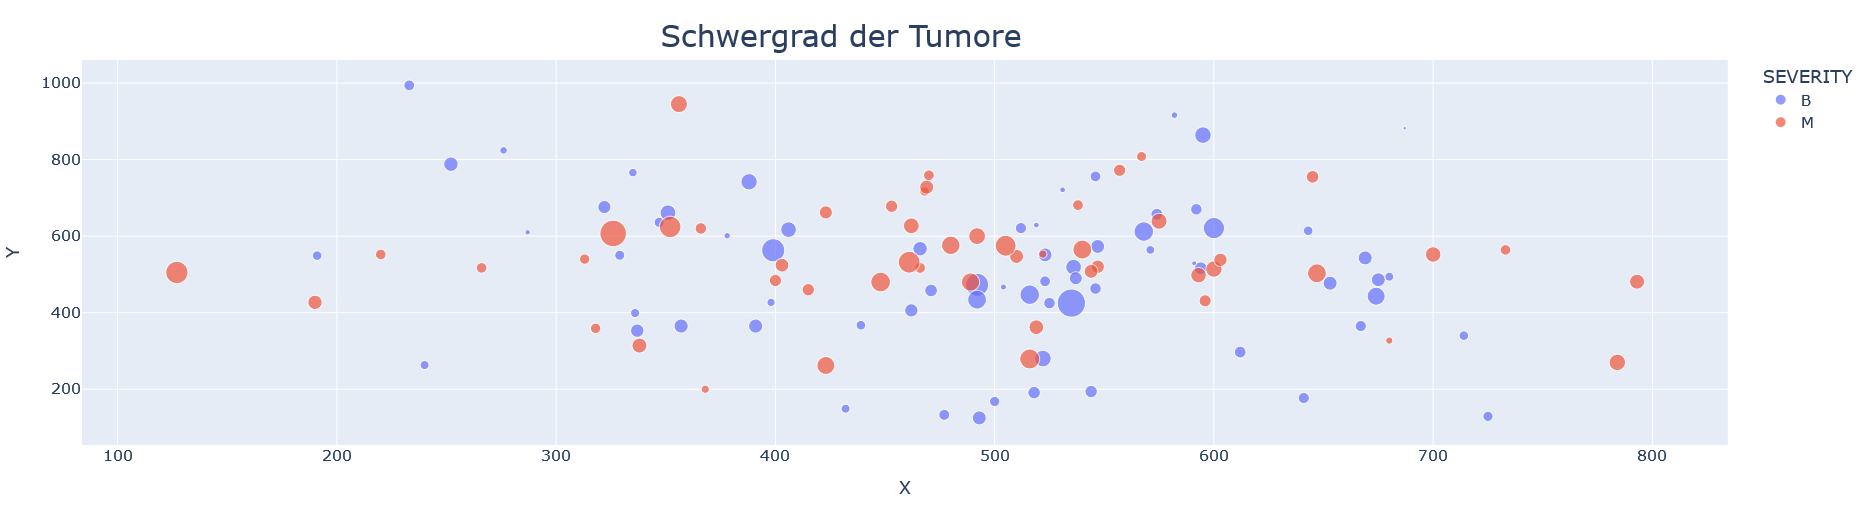

 mdb249-Bild mit hoher Brustdichte und Verkalkung (X=575, Y=639): Tumor mit einem Radius von 64 als bösartig diagnostiziert



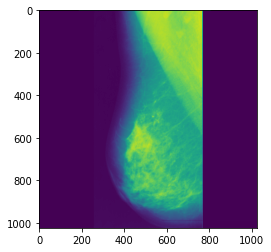

In [ ]:
print (' mdb249-Bild mit hoher Brustdichte und Verkalkung (X=575, Y=639): Tumor mit einem Radius von 64 als\033[1m bösartig\033[0m diagnostiziert\n')
img = Image.open(url+"mdb249.pgm")
img_arr= np.asarray(img)
plt.imshow(img_arr)
plt.show()

mdb223-Bild mit hoher Brustdichte und Verkalkung (X=523, Y=482): Tumor mit einem Radius von 29 als gutartig diagnostiziert



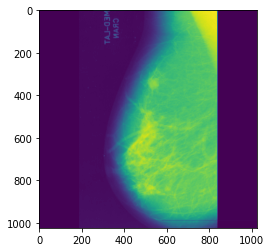

In [ ]:
print ('mdb223-Bild mit hoher Brustdichte und Verkalkung (X=523, Y=482): Tumor mit einem Radius von 29 als \033[1mgutartig\033[0m diagnostiziert\n')
img = Image.open(url+"mdb023.pgm")
img_arr= np.asarray(img)
plt.imshow(img_arr)
plt.show()